In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import json
import warnings

warnings.filterwarnings('ignore')

In [2]:
movie = pd.read_csv('movies.csv')
credit = pd.read_csv('credits.csv')

In [3]:
movie_credit = pd.merge(movie , credit , left_on = 'id' , right_on = 'movie_id')
movie_credit

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,...,spoken_languages,status,tagline,title_x,vote_average,vote_count,movie_id,title_y,cast,crew
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...",...,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800,19995,Avatar,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...",...,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500,285,Pirates of the Caribbean: At World's End,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...",...,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466,206647,Spectre,"[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de..."
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...",...,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106,49026,The Dark Knight Rises,"[{""cast_id"": 2, ""character"": ""Bruce Wayne / Ba...","[{""credit_id"": ""52fe4781c3a36847f81398c3"", ""de..."
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]",...,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124,49529,John Carter,"[{""cast_id"": 5, ""character"": ""John Carter"", ""c...","[{""credit_id"": ""52fe479ac3a36847f813eaa3"", ""de..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4798,220000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",NaN,9367,"[{""id"": 5616, ""name"": ""united states\u2013mexi...",es,El Mariachi,El Mariachi just wants to play his guitar and ...,14.269792,"[{""name"": ""Columbia Pictures"", ""id"": 5}]",...,"[{""iso_639_1"": ""es"", ""name"": ""Espa\u00f1ol""}]",Released,"He didn't come looking for trouble, but troubl...",El Mariachi,6.6,238,9367,El Mariachi,"[{""cast_id"": 1, ""character"": ""El Mariachi"", ""c...","[{""credit_id"": ""52fe44eec3a36847f80b280b"", ""de..."
4799,9000,"[{""id"": 35, ""name"": ""Comedy""}, {""id"": 10749, ""...",NaN,72766,[],en,Newlyweds,A newlywed couple's honeymoon is upended by th...,0.642552,[],...,[],Released,A newlywed couple's honeymoon is upended by th...,Newlyweds,5.9,5,72766,Newlyweds,"[

In [4]:
movie_credit['genres'][0]

'[{"id": 28, "name": "Action"}, {"id": 12, "name": "Adventure"}, {"id": 14, "name": "Fantasy"}, {"id": 878, "name": "Science Fiction"}]'

## Genre Distribution Bar Chart

In [5]:
genre_data = movie_credit['genres']
genre_data

0       [{"id": 28, "name": "Action"}, {"id": 12, "nam...
1       [{"id": 12, "name": "Adventure"}, {"id": 14, "...
2       [{"id": 28, "name": "Action"}, {"id": 12, "nam...
3       [{"id": 28, "name": "Action"}, {"id": 80, "nam...
4       [{"id": 28, "name": "Action"}, {"id": 12, "nam...
                              ...                        
4798    [{"id": 28, "name": "Action"}, {"id": 80, "nam...
4799    [{"id": 35, "name": "Comedy"}, {"id": 10749, "...
4800    [{"id": 35, "name": "Comedy"}, {"id": 18, "nam...
4801                                                   []
4802                  [{"id": 99, "name": "Documentary"}]
Name: genres, Length: 4803, dtype: object

In [6]:
#Create Data Frame from Sample data

df = pd.DataFrame({'genres' : genre_data})
df

,genres
0,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam..."
1,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""..."
2,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam..."
3,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam..."
4,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam..."
...,...
4798,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam..."
4799,"[{""id"": 35, ""name"": ""Comedy""}, {""id"": 10749, ""..."
4800,"[{""id"": 35, ""name"": ""Comedy""}, {""id"": 18, ""nam..."
4801,[]


In [7]:
#Create Data Frame from Sample data

df = pd.DataFrame({'genres' : genre_data})

#Funtion to extract  genre names from Json Data

def extract_genres(genre_json):
    genres = json.loads(genre_json)
    return[genre['name'] for genre in genres]

# Apply extract_genre function to each row in data frame

df['genre_names'] = df['genres'].apply(extract_genres) 
df['genre_names'].head(50)

0         [Action, Adventure, Fantasy, Science Fiction]
1                          [Adventure, Fantasy, Action]
2                            [Action, Adventure, Crime]
3                      [Action, Crime, Drama, Thriller]
4                  [Action, Adventure, Science Fiction]
5                          [Fantasy, Action, Adventure]
6                                   [Animation, Family]
7                  [Action, Adventure, Science Fiction]
8                          [Adventure, Fantasy, Family]
9                          [Action, Adventure, Fantasy]
10        [Adventure, Fantasy, Action, Science Fiction]
11                 [Adventure, Action, Thriller, Crime]
12                         [Adventure, Fantasy, Action]
13                         [Action, Adventure, Western]
14        [Action, Adventure, Fantasy, Science Fiction]
15                         [Adventure, Family, Fantasy]
16                 [Science Fiction, Action, Adventure]
17                         [Adventure, Action, F

In [8]:
#Create Data Frame from Sample data

df = pd.DataFrame({'genres' : genre_data})

#Funtion to extract  genre names from Json Data

def extract_genres(genre_json):
    genres = json.loads(genre_json)
    return[genre['name'] for genre in genres]

# Apply extract_genre function to each row in data frame

df['genre_names'] = df['genres'].apply(extract_genres)

# Flatten list of genre names

all_genres = [genre for genres in df ['genre_names'] for genre in genres]
all_genres

['Action',
 'Adventure',
 'Fantasy',
 'Science Fiction',
 'Adventure',
 'Fantasy',
 'Action',
 'Action',
 'Adventure',
 'Crime',
 'Action',
 'Crime',
 'Drama',
 'Thriller',
 'Action',
 'Adventure',
 'Science Fiction',
 'Fantasy',
 'Action',
 'Adventure',
 'Animation',
 'Family',
 'Action',
 'Adventure',
 'Science Fiction',
 'Adventure',
 'Fantasy',
 'Family',
 'Action',
 'Adventure',
 'Fantasy',
 'Adventure',
 'Fantasy',
 'Action',
 'Science Fiction',
 'Adventure',
 'Action',
 'Thriller',
 'Crime',
 'Adventure',
 'Fantasy',
 'Action',
 'Action',
 'Adventure',
 'Western',
 'Action',
 'Adventure',
 'Fantasy',
 'Science Fiction',
 'Adventure',
 'Family',
 'Fantasy',
 'Science Fiction',
 'Action',
 'Adventure',
 'Adventure',
 'Action',
 'Fantasy',
 'Action',
 'Comedy',
 'Science Fiction',
 'Action',
 'Adventure',
 'Fantasy',
 'Action',
 'Adventure',
 'Fantasy',
 'Action',
 'Adventure',
 'Adventure',
 'Fantasy',
 'Adventure',
 'Fantasy',
 'Adventure',
 'Drama',
 'Action',
 'Drama',
 'Romanc

In [9]:
#Create Data Frame from Sample data

df = pd.DataFrame({'genres' : genre_data})

#Funtion to extract  genre names from Json Data

def extract_genres(genre_json):
    genres = json.loads(genre_json)
    return[genre['name'] for genre in genres]

# Apply extract_genre function to each row in data frame

df['genre_names'] = df['genres'].apply(extract_genres)

# Flatten list of genre names

all_genres = [genre for genres in df ['genre_names'] for genre in genres]

# Count occurance of each genre:

pd.Series(all_genres).value_counts()

Drama              2297
Comedy             1722
Thriller           1274
Action             1154
Romance             894
Adventure           790
Crime               696
Science Fiction     535
Horror              519
Family              513
Fantasy             424
Mystery             348
Animation           234
History             197
Music               185
War                 144
Documentary         110
Western              82
Foreign              34
TV Movie              8
dtype: int64

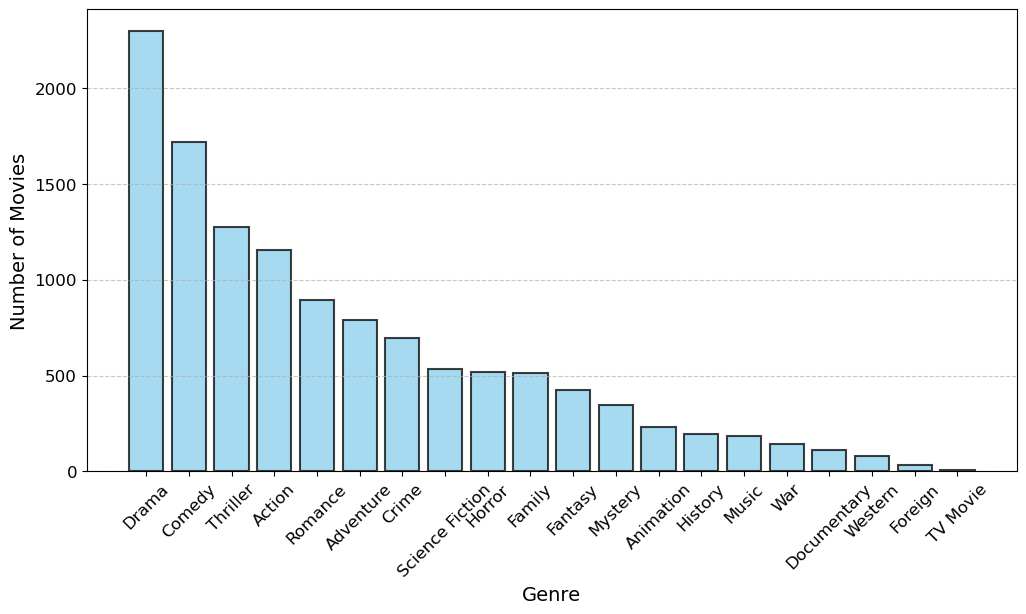

In [15]:
#Create Data Frame from Sample data

df = pd.DataFrame({'genres' : genre_data})

#Funtion to extract  genre names from Json Data

def extract_genres(genre_json):
    genres = json.loads(genre_json)
    return[genre['name'] for genre in genres]

# Apply extract_genre function to each row in data frame

df['genre_names'] = df['genres'].apply(extract_genres)

# Flatten list of genre names

all_genres = [genre for genres in df ['genre_names'] for genre in genres]

# Count occurance of each genre:

genre_counts = pd.Series(all_genres).value_counts()

#find most common genre

most_common_genre = genre_counts.idxmax()

#create stylish bar chart

plt.figure(figsize = (12,6))
plt.bar(genre_counts.index , genre_counts.values , color = 'skyblue' , alpha = 0.75 , edgecolor = 'black' , linewidth = 1.5)
plt.xlabel('Genre' , fontsize= 14)
plt.ylabel('Number of Movies' , fontsize = 14)
plt.yticks( fontsize = 12)
plt.xticks(rotation = 45 , fontsize = 12)
plt.grid(axis = 'y' , linestyle = '--' , alpha = 0.7)
plt.grid(axis = 'x' , linestyle = ' ')


plt.show()

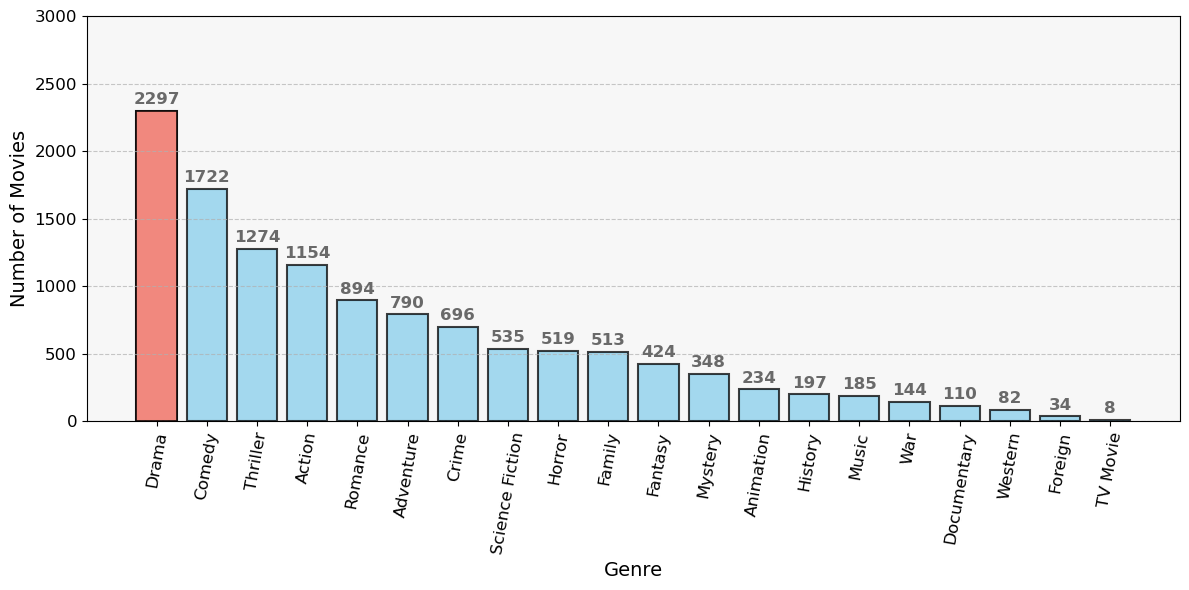

In [19]:
#Create Data Frame from Sample data

df = pd.DataFrame({'genres' : genre_data})

#Funtion to extract  genre names from Json Data

def extract_genres(genre_json):
    genres = json.loads(genre_json)
    return[genre['name'] for genre in genres]

# Apply extract_genre function to each row in data frame

df['genre_names'] = df['genres'].apply(extract_genres)

# Flatten list of genre names

all_genres = [genre for genres in df ['genre_names'] for genre in genres]

# Count occurance of each genre:

genre_counts =pd.Series(all_genres).value_counts()

#find most common genre

most_common_genre = genre_counts.idxmax()

#create stylish bar chart

plt.figure(figsize = (12,6))
plt.bar(genre_counts.index , genre_counts.values , color = 'skyblue' , alpha = 0.75 , edgecolor = 'black' , linewidth = 1.5)
plt.xlabel('Genre' , fontsize= 14)
plt.ylabel('Number of Movies' , fontsize = 14)
plt.yticks(fontsize = 12)
plt.grid(axis = 'y' , linestyle = '--' , alpha = 0.7)
plt.grid(axis = 'x' , linestyle = ' ')

# Highlight most common genre

plt.bar(most_common_genre, genre_counts[most_common_genre], color = 'salmon', alpha = 0.9, edgecolor = 'black' , linewidth= 1.2)

#Customized Y -TICKS

plt.yticks(range(0,3001,500), fontsize =12)

# Add Data Labels

for genre, count in zip(genre_counts.index,genre_counts.values):
    plt.text(genre, count +50 , str(count), ha = 'center' , fontsize = 12 , fontweight = 'bold' , color = 'dimgrey')
    
# Customize tick labels

plt.xticks(rotation = 80 ,fontsize = 12)

# Adding Background Color

ax = plt.gca()
ax.set_facecolor('#f7f7f7')

# Display Chart with Aesthetic

plt.tight_layout()

plt.show()